In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

dict_keys(['evtID', 'h_time_without_charge', 'h_time_with_charge', 'XYZ', 'Erec', 'evtID_PSD', 'TriggerTimeInterval', 'evtType', 'R3', 'PSD'])
{'train': Counter({0: 85916, 1: 85916}), 'test': Counter({0: 117041, 1: 57278}), 'total': Counter({0: 202957, 1: 143194})}
Optimized Efficiency:
 Background inefficiency:	 0.165 % +- 0.012 
Signal efficiency:	 97.854 % +- 0.061

Optimized Ratio of Residue:
 Background Ratio:	 0.238 % +- 0.013 
Signal Ratio:	 99.762 % +- 0.013

##############################################

dict_keys(['evtID', 'h_time_without_charge', 'h_time_with_charge', 'XYZ', 'Erec', 'evtID_PSD', 'TriggerTimeInterval', 'evtType', 'R3', 'PSD'])
Cannot get dir_n_samples!!! You need to set it by hand !!Continue
Optimized Efficiency:
 Background inefficiency:	 0.095 % +- 0.0083 
Signal efficiency:	 98.328 % +- 0.049

Optimized Ratio of Residue:
 Background Ratio:	 0.137 % +- 0.0098 
Signal Ratio:	 99.863 % +- 0.0098

##############################################



,index,Signal Eff.,Background Eff.,(Signal Residue)/(Total Residue),(Background Residue)/(Total Residue)
0,w/o vertex,97.854 % +- 0.061,0.165 % +- 0.012,99.762 % +- 0.013,0.238 % +- 0.013
1,w/ vertex,98.328 % +- 0.049,0.095 % +- 0.0083,99.863 % +- 0.0098,0.137 % +- 0.0098


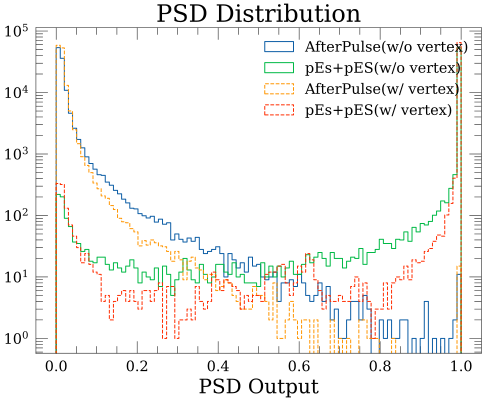

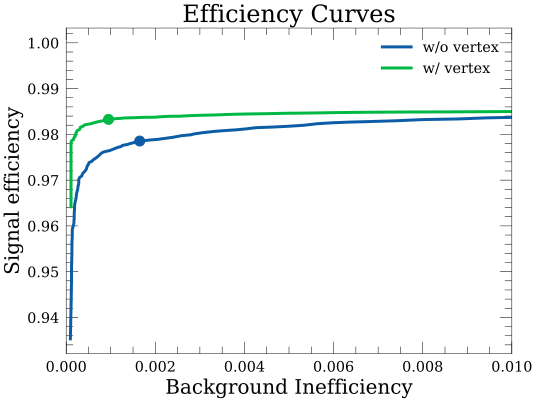

In [34]:
from copy import copy
from scipy.interpolate import interp1d

from importlib import reload
import DiscriminationTools
reload(DiscriminationTools)
from DiscriminationTools import  DiscriminationTools
discrimination_tool = DiscriminationTools()

option_time_profile = "_NotSubtractTOF"
option = "_add_TriggerTimeInterval"

v_line_stype = ['-', "--"]
v_labels = ["w/o vertex", "w/ vertex"]
v_tags = ["AfterPulse", "pEs+pES"]

dir_n_samples = {'train': {0: 85916, 1: 85916}, 'test': {0: 117041, 1: 57278}, 'total': {0: 202957, 1: 143194}}

dir_events_diff_option = {}

for i, option_time_profile in enumerate(["_NotSubtractTOF", ""]):
    discrimination_tool.GetPredictionData(f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/predict_Combine{option}{option_time_profile}.npz")
    discrimination_tool.SetNSamplesDict(dir_n_samples)
    discrimination_tool.GetPSDDistribution(v_tags=[f"{tag}({v_labels[i]})" for tag in v_tags],ls=v_line_stype[i])
    discrimination_tool.PlotROCCurves( xlim=(0,0.01), label=v_labels[i])
    discrimination_tool.MaximumSignificance(condition=v_labels[i])

discrimination_tool.PrintEffDataframe()
